
### Author: Rohan Thakkar
### Credits for data source: DataLab, University of Washington Seattle 

## Introduction to the problem

For this project, I will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz.

The goal of this problem is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics


Summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village).

In [1]:
import pandas as pd

import numpy as np

# Importing required package for plotting
import pylab as plt

# Module for plotting
import matplotlib

# For plotting the images on the same page
%matplotlib inline

# SciPy implements many different numerical algorithms
import scipy

from scipy import stats

# Read the data set and store it in 'progresa' named data-frame
progresa = pd.read_csv('progresa_sample.csv')

# Remove the rows with N/A value in either of the columns
progresa = progresa.dropna()

# Create empty lists to store modified values of columns
d = []
e = []
x = []

# If poor = 'pobre', replace by 1; else 0
for i in progresa.poor:
    if i == 'pobre':
        d.append(1)
    else:
        d.append(0)
   

# If progresa = 'basal', replace by 1; else 0
for j in progresa.progresa:
    if j == 'basal':
        e.append(1)
    else:
        e.append(0)
    
# Transforming 1997 and 1998 to 0 and 1 for simplicity reasons and further use in double difference regression   
# If year = 1997, replace by 0; else 1
for k in progresa.year:
    if k == 97:
        x.append(0)
    else:
        x.append(1)

# Replace columns by new values        
progresa.poor = d
progresa.progresa = e    
progresa.year = x

# Creating index for new data frame to store demographic variables
index = pd.Series(['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n',
       'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age','grc97', 'sc97'])

# Creating columns for new data frame to store demographic variables
columns = {'avg','std_dev'}

# Creating an empty data frame named 'new' to store mean and standard deviations of demographic variables
new = pd.DataFrame(index = index, columns = columns) 

# Creating new data frame with columns 'year','folnum' and 'vilage' dropped
progresa_1 = progresa[['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n',
       'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age','grc97', 'sc97']]

# Calculating the mean and standard values in the empty data frame
for i in range(18):
    new.std_dev[i] = progresa_1[progresa_1.columns[i]].std()
    new.avg[i] = progresa_1[progresa_1.columns[i]].mean()

# Display summary statistics (mean and std. dev) of each variable
new

/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,avg,std_dev
sex,0.513572,0.499819
indig,0.291305,0.454367
dist_sec,2.34699,2.11128
sc,0.821102,0.38327
grc,4.08949,2.44761
fam_n,7.22467,2.32942
min_dist,103.595,42.0255
dist_cap,148.748,77.134
poor,0.847606,0.359405
progresa,0.618545,0.485747


### 1.2 Differences at baseline?

Checking if the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

In [2]:
# Poor people in the treatment group in 1997
pdiff_1 = progresa[progresa.year == 0][progresa.poor == 1][progresa.progresa==1]

# Poor people in the control group in 1997
pdiff_2 = progresa[progresa.year == 0][progresa.poor == 1][progresa.progresa==0]

# Removing sc, grc, sc97, grc97, progresa since they are not demographic characteristics
index_2 = pd.Series(['sex', 'indig', 'dist_sec', 'fam_n',
       'min_dist', 'dist_cap', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age'])

# Defining the columns of the required output table
columns_2 = pd.Series(['avg_treatment', 'avg_control', 'difference', 'p_value','significant'])


# Creating a new data frame for poor people in the treatment group in 1997 with unnecessary columns removed
pdiff_1_1 = pdiff_1[['sex', 'indig', 'dist_sec', 'fam_n',
       'min_dist', 'dist_cap', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age']]

# Creating a new data frame for control people in the treatment group in 1997 with unnecessary columns removed
pdiff_2_1 = pdiff_2[['sex', 'indig', 'dist_sec', 'fam_n',
       'min_dist', 'dist_cap', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age']]

# Creating a new data frame to store the values required in the question
new_2 = pd.DataFrame(index = index_2, columns=columns_2)

# Filling the data frame with average treatment value, average control value, difference in the two and p-value for the characteristic
for i in range(12):
    # Average value of column in treatment group in 1997
    new_2.avg_treatment[i] = pdiff_1_1[pdiff_1_1.columns[i]].mean()
    # Average value of column in control group in 1997
    new_2.avg_control[i] = pdiff_2_1[pdiff_2_1.columns[i]].mean()
    # Difference in the average values of column in treatment and control group in 1997
    new_2.difference[i] = new_2.avg_treatment[i] - new_2.avg_control[i]
    # Calculating the p-value for statistical difference using a t-statistic test on treatment and control groups in 1997 with N/As removed
    new_2.p_value[i] = scipy.stats.ttest_ind(pdiff_1_1[pdiff_1_1.columns[i]], pdiff_2_1[pdiff_2_1.columns[i]]).pvalue
    # If P-value <0.05, it is statistically significant; else it is not
    if new_2.p_value[i]>0.05:
        new_2.significant[i] = "NO"
    else:
        new_2.significant[i] = "YES"
    
# Displaying filled-out data frame
new_2

/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,avg_treatment,avg_control,difference,p_value,significant
sex,0.520268,0.506556,0.0137127,0.0195696,YES
indig,0.316744,0.325306,-0.00856191,0.118376,NO
dist_sec,2.39965,2.40069,-0.00103892,0.967095,NO
fam_n,7.28103,7.30294,-0.0219074,0.423609,NO
min_dist,107.395,103.098,4.29688,1.93666e-18,YES
dist_cap,151.801,154.492,-2.69062,0.00341419,YES
hohedu,2.72673,2.66098,0.0657472,0.0261324,YES
hohwag,550.207,580.694,-30.4874,0.000272766,YES
welfare_index,656.81,661.594,-4.78304,0.000372404,YES
hohsex,0.925586,0.923387,0.00219928,0.478123,NO


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 


There are statistically significant differences between the poor in treatment and control villages at baseline for certain demographic characteristics like sex, minimum distance to urban center, minimum distance to capital as well as household head's education, monthly wages and age. Also, the welfare index has a statistically significant difference.

* B: Why does it matter if there are differences at baseline?

It may matter if there are differences at baseline when we adopt impact evaluation approaches like the single difference approach which measure the impact of a treatment only by comparing only the post-treatment values for treatment and control groups.  This is on an assumption that the pre-treatment values would have been statistically indifferent for the treatment and control groups.  In the difference-in-difference approach, however, we take into account the difference in pre-treatment values of the treatment and control groups and thus, the differences at baseline do not really matter much here.

* C: What does this imply about how to measure the impact of the treatment?

When there are statistically significant differences between treatment and control villages as baseline, it is advisable to use impact evaluation approaches like the difference-in-difference approach which also account for this difference in pre-treatment values of treatment and control groups.  Using simple difference approach in these cases might not be the best idea.

### 1.4 Graphical exploration, part 1

For each level of household head education, let's compute the average enrollment rate in 1997.

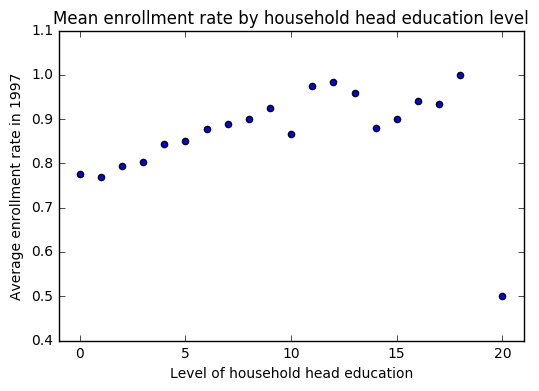

In [3]:
# Subsetting for year=1997 and grouping by the level of household head education, calculating the mean for 
f1 = progresa[progresa.year==0].groupby([progresa.hohedu]).mean()

# Making a scatter plot for mean enrollment rate in 1997 v/s household head education level
plt.scatter(f1.hohedu, f1.sc)

# Since the range of level of household head education ranges from 0 to 20 only
plt.xlim([-1,21])

# Naming the title, x-axis and y-axis of the plot
plt.title('Mean enrollment rate by household head education level')
plt.xlabel('Level of household head education')
plt.ylabel('Average enrollment rate in 1997')

# Displaying the resultant diagram
plt.show()

From the above scatterplot, I understand that on a general note, the average enrollment rate in 1997 was higher for a higher level of education of the household head, except for the last case where average enrollment rate for the highest level of education (= 20) had surprisingly the lowest enrollment rate in the chart.

### 1.5 Graphical exploration, part 2

Lets explore the village enrollment rates **among poor households in treated villages**, before and after treatment.

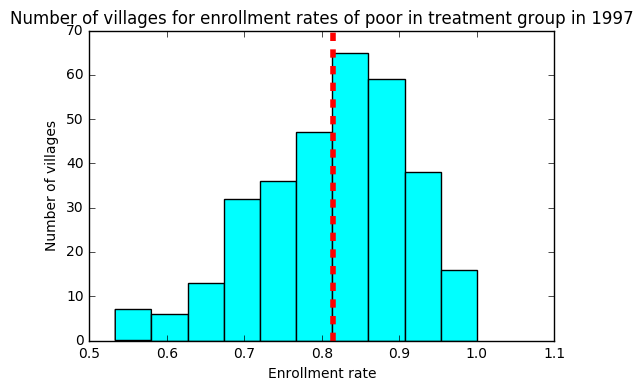

In [4]:
# Remember that pdiff_1 represents the poor in treatment before treatment (in 1997)

# Grouping by village-id and calculating the corresponding mean column values for each row
sample_1 = pdiff_1.groupby(pdiff_1.village).mean()

#import matplotlib.pyplot as plt

# Histogram of the enrollment rates of the poor in treatment group in 1997
sample_1['sc'].plot(kind='hist', stacked=True, color='cyan') 
   
# Drawing a vertical line intersecting the X-axis at the average enrollment rate for the treatment group in 1997
plt.axvline(sample_1.sc.mean(), color='r', linestyle='dashed', linewidth=4)

# Naming the title of the plot
plt.title('Number of villages for enrollment rates of poor in treatment group in 1997')

# Labeling the X-axis
plt.xlabel('Enrollment rate')
# Labeling the Y-axis
plt.ylabel('Number of villages')

/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


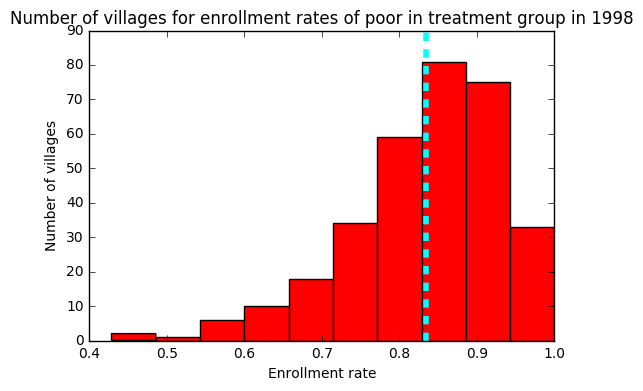

In [5]:
# Creating a data frame for the poor in treatment group in 1998
pdiff_3 = progresa[progresa.year == 1][progresa.poor == 1][progresa.progresa==1]

# Grouping by village-id and calculating the corresponding mean column values for each row
sample_2 = pdiff_3.groupby(pdiff_3.village).mean()

# Histogram of the enrollment rates of the poor in treatment group in 1998
sample_2['sc'].plot(kind='hist', stacked=True, color='red') 
    
# Drawing a vertical line intersecting the X-axis at the average enrollment rate for the treatment group in 1998
plt.axvline(sample_2.sc.mean(), color='cyan', linestyle='dashed', linewidth=4)

# Naming the title of the plot
plt.title('Number of villages for enrollment rates of poor in treatment group in 1998')

# Labeling the X-axis
plt.xlabel('Enrollment rate')

# Labeling the Y-axis
plt.ylabel('Number of villages')

As we can see from the above two histogram plots, there surely is a difference in the average value of enrollment rate in the two cases, with the value being around 0.81 in the first case, whereas it being around 0.83-0.84 in the sceond case.  To measure the statistical significance of the difference in the two, we run a T-test and compare the resultant P-value with 0.05 (Assuming a 95% confidence interval) to test the null hypothesis.

In [6]:
# Running a t-test to compare the average enrollment rates of the treatment group in two years and comparing the resultant P-value with 0.05
print '\nQuestion: Is the P-value lesser than 0.05?\nAnswer:',scipy.stats.ttest_ind(sample_1.sc, sample_2.sc).pvalue<0.05


Question: Is the P-value lesser than 0.05?
Answer: True


Thus, we can see that the P-value of the difference in the two average values is less than 0.05, which means that there is a strong evidence against the null hypothesis, which leads us to support the alternative hypothesis that there indeed is a statistically significant difference in the average values of the enrollment rates of the treatment group in 1997 and 1998 for the poor in treatment group.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Let us begin by estimating the impact of Progresa using "simple differences" - restricting to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages and then use a t-test to determine if this difference is statistically significant.

In [7]:
# To represent the poor in the control group in 1998
pdiff_4 = progresa[progresa.year == 1][progresa.poor == 1][progresa.progresa==0]

# Since pdiff_3 represents the poor in treatment group in 1998, the average enrollment rate among poor households in the treatment group in 1998 can be calculated as the following
avg_enrol_1 = pdiff_3.sc.mean()

# Average enrollment rate among poor households in the control group in 1998
avg_enrol_2 = pdiff_4.sc.mean()

print 'Average enrollment rate among poor households in the treatment group in 1998 is',avg_enrol_1

print 'Average enrollment rate among poor households in the control group in 1998 is', avg_enrol_2

print 'Single difference is',avg_enrol_1-avg_enrol_2

# Running a T-test on the difference in enrollment rates of the poor in treatment and control groups in 1998 and display the resultant P-value
print '\nThe P-value of the difference calculated from the T-test is ',scipy.stats.ttest_ind(pdiff_3.sc, pdiff_4.sc).pvalue

# Comparing the resultant P-value with 0.05 (assuming a 95% confidence interval to test the null hypothesis)
print '\nQuestion: Is the P-value lesser than 0.05?\nAnswer:',scipy.stats.ttest_ind(pdiff_3.sc, pdiff_4.sc).pvalue<0.05

Average enrollment rate among poor households in the treatment group in 1998 is 0.849257030578
Average enrollment rate among poor households in the control group in 1998 is 0.810923092512
Single difference is 0.0383339380665

The P-value of the difference calculated from the T-test is  5.65645560536e-16

Question: Is the P-value lesser than 0.05?
Answer: True


/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Since the single difference can be calculated as (Average enrollment of treatment) - (Average enrollment of control), the percentage impact of the program can be estimated to be 3.83% according to the single difference in enrollment rates of treatment v/s control groups.

On running the T-test to determine statistical significance in difference between the average enrollment of treatment and control groups in 1998, we get the resultant P-value to be lesser than 0.05, which means that we reject the null hypothesis that the two values are comparable and accept the alternative hypothesis that the two have a statistically significant difference.

### 2.2 Simple differences: Regression

Let us estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment

Thus the regression can be represented as y =  0.0383339380665 * f2.progresa + 0.810923092512  with a standard error of 0.00473162091943


/Users/rohanmanojthakkar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


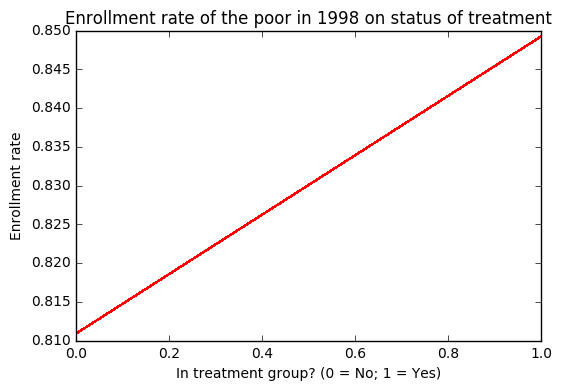

In [8]:
# Importing package needed for fitting linear regression
import scipy.stats as stats

# Considering only the entries with non-N/A values for enrollment of the poor in 1998
f2 = progresa[progresa.year==1][progresa.poor==1]

# Extracting the parameters of fitted linear regression
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(f2.progresa, f2.sc)

# Plotting a line y = slope*x where slope is determined from the above regression and x is the predictor variable, i.e., 'hour'
print 'Thus the regression can be represented as y = ',slope_1,'* f2.progresa', '+', intercept_1,' with a standard error of',std_err_1

# Writing the equation of the regression line
y = slope_1*f2.progresa+intercept_1

# Adding the above line to earlier scatter plot
plt.plot(f2.progresa, y, 'r-')

# Naming the title, x-axis and y-axis of the plot
plt.title('Enrollment rate of the poor in 1998 on status of treatment')
plt.xlabel('In treatment group? (0 = No; 1 = Yes)')
plt.ylabel('Enrollment rate')

# Displaying the resultant diagram
plt.show()

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?

Based on this model, Progresa increased the likelihood of a child enrolling by the value of the slope of the regression function, i.e., 0.0383339380665 which means by 3.83%.  We can say so because the predictor variable is 1 if treatment has occured and 0 otherwise, resulting in the co-efficient of this term being the difference in the value of response variable between the two cases.

In [9]:
print '\nP-value is',p_value_1,'\nQuestion: Can we reject the null hypothesis that the treatment effects are zero?\nAnswer:',p_value_1<0.05


P-value is 5.65645560536e-16 
Question: Can we reject the null hypothesis that the treatment effects are zero?
Answer: True


* How does this regression estimate compare to your t-test estimate from part 2.1?

As we compare the regression estimate (i.e., the slope of the regression line) to the single-difference, we understand that the rwo valeus are exactly the same = 0.0383339380665 and so are the P-values in both the cases = 5.65645560537e-16.  Thus, the estimates provided by regression and t-test are the same.

* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?

Since the P-value of the regression line is once again less than 0.05 (assuming a 95% confidence interval), we can reject the null hypothesis that the treatment effects are zero.  Alternatively, this means that the treatment effects have a non-negligible impact on enrollment rate.

* What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this regression is that the values of the treatment and the control groups would have been the same in the absence of treatment, with the value being equal to the intercept of the above regression, i.e., 0.810923092512.  This can be understood as the case of regression where f2.progresa == 0 (absence of treatment), thus resulting in the enrollment rate being equal to the intercept of the line.

### 2.3 Multiple Regression

Let us try and re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

In [10]:
# Needed to fit multipleregression model
import statsmodels.formula.api as smf

# Adding some control variables that were not statistically different at the baseline and fitting a multiple regression model
new = smf.ols(formula = 'sc ~ progresa + age + fam_n + hohsex + indig + dist_sec', data = f2).fit()

# Printing the summary table of the fitted linear regression
print new.summary()

# Printing the co-efficient of the treatment variable
print '\nCo-efficient of the treatment variable in regression is',new.params[1]

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     1522.
Date:                Tue, 20 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:02:17   Log-Likelihood:                -7287.0
No. Observations:               26155   AIC:                         1.459e+04
Df Residuals:                   26148   BIC:                         1.465e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5619      0.013    124.095      0.0

* How do the controls affect the point estimate of treatment effect?

On adding additional controls like age, household head's sex, family size, whether or not is the child indigenous to the area, and the nearest distance to secondary school, the point estimate of treatment effect is the value of the co-efficient of the progresa variable, i.e., 0.0356 which is lesser as compared to the earlier case (0.038) where there was no control variable.


* How do the controls affect the standard error on the treatment effect? 

Adding additional controls only minorly impact the standard error of the treatment effect which is 0.004 in this case as compared to the earlier case with no control variable where the standard error was estimated to be 0.0047.  This is also reasonable since the control variables are expected to identify the relationship among predictor variables, thus giving a better estimate of the impact of any predictor variable, instead of causing a significant difference in the measured standard error.


* How to interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

By interpreting the differences between my estimates of 2.2 and 2.3, I understand that the enrollment rate is not only affected by the classification of an entry into treatment and control, but also depends on additional control variables, because of which the impact of the 'progresa' predictor is slightly lesser when additional control variables are added, compared to the case of simple linear regression with only one predictor variable based on treatment status.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Let us begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is our estimate.

In [11]:
# Enrollment rate of poor in treatment class in 1997 
avg_enrol_3 = pdiff_1.sc.mean()

# Enrollment rate of poor in control class in 1997
avg_enrol_4 = pdiff_2.sc.mean()

# Since avg_enrol_1 represent the average enrollment of poor in treatment group in 1998 and avg_enrol_2 represent the average enrollment of poor in control group in 1998
print 'The estimate of impact of Progresa according to difference-in-difference approach is',(avg_enrol_1-avg_enrol_3)-(avg_enrol_2-avg_enrol_4)

The estimate of impact of Progresa according to difference-in-difference approach is 0.0307029732307



* What is the estimate of the impact, and how does it compare to your earlier (simple difference) results?


Thus, we see that by the difference-in-difference approach of impact evaluation, the estimate of Progresa is 3.07% which is lower than the estimate of the same by simple-difference approach where the value was 3.83%.  This means that the impact of the progresa treatment is evaluated to be lesser in the difference-in-difference approach as compared to the simple difference approach.  This might be because the simple difference approach only takes into account the values of treatment and control group post-treatment, as compared to the difference-in-difference approach which also weighs pre-treatment values into consideration while evaluating the impact.

* What is the counterfactual assumption underlying this estimate? 

The counterfactual assumption underlying this estimate is that in the absence of treatment, the enrollment rates in both the treatment and control groups must have changed by the same amount, which is why we can measure the impact of Progresa by calculating essentially how much did the average enrollment rate of the treatment group differ in post-treatment as compared to its expected value in post-treatment if there was no treatment.

### 2.5 Difference-in-Difference, version 1 (regression)

Now we use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

In [15]:
# Adding some control variables that were not staistically different at the baseline and fitting a multiple regression model
new_2 = smf.ols(formula = 'sc ~ progresa + year + progresa*year + age + fam_n + hohsex + indig + dist_sec', data = progresa[progresa.poor==1]).fit()

# Printing the summary table of the fitted linear regression
print new_2.summary()

# Printing the co-efficient of the interaction variable
print '\nCo-efficient of the interaction term in regression is',new_2.params[3]

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     2670.
Date:                Tue, 20 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:08:08   Log-Likelihood:                -16386.
No. Observations:               56893   AIC:                         3.279e+04
Df Residuals:                   56884   BIC:                         3.287e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5370      0.008    181.111

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

My estimate of the impact of the Progresa treatment is around 0.0304 with a standard error of 0.006.  I get these values from the above summary table for the fitted regression model, where the interaction term essentially denotes the the actual effect of treatment in the difference-in-difference context.  Thus, the co-efficient of the product (interaction) term becomes the estimate of the impact of the treatment with the corresponding standard error.  

The difference-in-difference approach estimates the impact of treatment as:
(Treatment group's post observation - Treatment group's pre observation) - (Control group's post observation - Control group's pre observation)


* How do these estimates of the treatment effect compare to the estimates based on the simple difference?

The estimates of the treatment effect in the difference-in-difference approach is, lower than the estimates based on the simple difference in terms of co-efficient (0.0304 in this case compared to 0.0356 in simple difference) but has a slightly higher standard error of 0.006, compared to 0.004 in the previous case.

* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?

The impact estimate of treatment on enrollment is just slightly lesser with additional control variables (0.0304) compared to the difference-in-difference estimates from 2.4 above (0.0307). The difference is not much - when additional control variables were added in the simple difference case, the estimated impact changed by a comparatively higher degree as compared to the change in estimate made by difference-in-difference on addition of control variables.  Hence, we can comment that the difference-in-difference approach has a better performance in measuring the impact of the treatment.

Nonetheless, the slight difference in difference-in-difference approach can be attributed to the fact that additional control variables like age,hohsex,hohsex,indig and dist_sec also have a non-zero impact on the enrollment rate, even in the difference-in-difference approach.  However, the impact of control variables is much lesser in this case as compared to the simple difference approach.

* What is the counterfactual assumption underlying this regression? 

The counterfactual assumption underlying this regression is that the change in enrollment rate from 1997 to 1998 should have been the same for the poor households in the treatment and control group, provided that the values of the control variables like age,hohsex,hohsex,indig and dist_sec remain the same as well.

### 2.6 Difference-in-Difference, version 2

In the previous problem, we estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

In [16]:
# Creating f3 to store all the entires in 1998
f3 = progresa[progresa.year==1]

# Columns 'progresa' and 'poor' with the same control variables as above and fitting multiple regression model
new_3 = smf.ols(formula = 'sc ~ progresa + poor + progresa*poor + age + hohsex + hohedu + sex + indig + dist_sec', data = f3).fit()

# Printing the summary table of regression
print new_3.summary()

# Printing the co-efficient of the interaction variable
print '\nCo-efficient of the interaction term in regression is',new_3.params[3]

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1223.
Date:                Tue, 20 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:08:21   Log-Likelihood:                -8815.6
No. Observations:               30665   AIC:                         1.765e+04
Df Residuals:                   30655   BIC:                         1.773e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5348      0.014    113.463

* How would we estimate this version of the treatment effects in a regression model? 

We would estimate this version of the treatment effects in a regression model by checking the value of the co-efficient of the interaction term in the regression function (in this case- the co-efficient of the term 'progresa*poor').  Here, it is 0.0082 which means it has only a 0.82% impact on the enrollment rate.

* What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this regression is that in the absence of treatment, the difference between the average enrollment rates of the treatment and control groups should be the same for poor and non-poor families.

* How do these treatment effects compare to the estimates above?

These treatment effects are much lower (in the order of 0.008) as compared to the estimates above (0.03), which means that which are poor and in the treament group have, on on average, an enrollment rate of only 0.008 higher than those who are not.  In the earlier case, this difference was as high as 0.03.

* Discuss some possible explanations for differences or similarities.

The PROGRESA treatment had an impact in the sense that it might have increased the enrollment rate of the poor in treatment villages in 1998 (post-treatment period) as compared to 1997 (pre-treatment period).  Hence, the estimate in the earlier case of measuring impact versus time is a more accurate deterministic of the impact of treatment.  In this approach, however, we compare the difference in enrollment rates in the poor and non-poor families in 1998 instead which is not a good idea as it does not take into account the enrollment rates pre-treatment and hence does not really estimate how the treatment impacted the poor over time.  

Taking the difference in enrollment rates of the poor and non-poor over the treatment and control groups fails to take into account the possible increase in enrollment rates of the non-poor as well which is not something we are concerned about as the PROGRESA treatment concerns itself with the poor only.

### 2.7 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 

* Let us describe one or two reasons why PROGRESA might have impacted non-poor households.

While the PROGRESA treatment is meant to not affect non-poor households, there might have been some errors in program administration errors nonetheless, accounting for a few unplanned mappings of families to groups. 

Putting errors aside, let us consider this case - Now since the welfare threshold for selection may be known in public, the non-poor households with incomes just slightly greater than the threshold may start spending some of their money to send their children to school and in this way, their income may eventually fall below the threshold, thus enabling them to become receipents of the PROGRESA treatment for the next year. There might be similar differential spillover effects by gender, age, and other household characteristics.

On a moral tone, there is also a possibility that after witnessing the stress of the government on education through PROGRESA plans, non-poor families might be motivated to send their kids to the schools, so they can be at-par with the children of poor families receiving grants to attend schools, thus impacting the enrollment rates of children in non-poor households.

In [14]:
# Fitting multiple regression model with progresa and year and the interaction term between the two
new_4 = smf.ols(formula = 'sc ~ progresa + year + progresa*year', data = progresa[progresa.poor==0]).fit()

# Printing the summary table of regression
print new_4.summary()

# Printing the co-efficient of the interaction variable
print '\nCo-efficient of the interaction term in regression is',new_4.params[3]

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.993
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           0.000447
Time:                        21:02:18   Log-Likelihood:                -5317.6
No. Observations:               10229   AIC:                         1.064e+04
Df Residuals:                   10225   BIC:                         1.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.7637      0.009     89.460

* B: Any impacts of PROGRESA on the non-poor?

As we can see from the above regression-summary table, the co-efficient of the interaction term is quite low, i.e., -0.0022 with a corresponding P-value of 0.893 which is too high to reject the null hypothesis of there actually being not a significant impact of PROGRESA on the poor.  Thus, we do not observe any significant impacts of PROGRESA on the non-poor households.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

The first criterion to classify a relationship as causal is to run a randomized experiment and verify the results for causality, like we have already done above.  The poor households were randomly classified in treatment and control and thus, there was no bias in that sense. Based on all the analysis undertaken above, we can certainly conclude that there was a correlation between the enrollment rates of the poor in Mexico and the Progresa program.  The impact of the treatment is associated with roughly 3-4% increase with standard errors of roughly 0.4-0.6% in the enrollment rates of poor households in the treatment group as seen in the analyses 2.1 - 2.5:

- Simple differences (T-test & regression): The impact of treatment had a co-efficient of 0.03833, i.e., 3.83% impact.  The associated P-value was less than 0.05.

- Multiple regression: The impact of treatment had a co-efficient of 0.0356, i.e., 3.56% impact.  The associated P-value was less than 0.05.

- Difference-in-difference (tabular): The impact was estimated to be 0.0307, i.e., 3.07% impact.

- Difference-in-difference (regression): The impact of the interaction term (treatment effect) had a co-efficient of 0.0304, i.e., 3.04% impact.  The associated P-value was less than 0.05.

Thus, in each of the cases, the treatment had an impact on the enrollment rate and the associated P-value in each of the cases was less than 0.05, thus implying a statistically significant impact of the treatment on the enrollment rates.

Now that we have interpreted that the correlation is strong, let us consider some other facts - 

- When we try and analyze the difference in enrollment rate between the poor and non-poor families over treatment and control, we understand that the impact is not at all significant in this case (0.22% impact with an associated P-value of 0.893) which means that there fails to be any other explanation to weigh the impact of PROGRESA over time, since the effect occurs after cause, thus ensuring specificity and temporality.

- The effect is also plausible since there is a logical understanding between receiving grants to send children to school and the resultant increae in enrollment rates, which means that this effect is directly related to the cause and it is not some sort of a spillover effect with an additional hidden reasoning resulting to this output.

- Similarly coherent poverty alleviation strategies at other countries have also resulted in an increase in the average enrollemt rates of schools, which means that there clearly is an established analogy between the treatment effects and the enrollment rates and PROGRESA is not the only one of its kind, thus making it reasonable to call this effect as causal than merely correlational.


Since we account for strength, specificity, temporality, plausibility, coherence and anology of this relationship in a randomized experiment platform, we can safely conclude that Progresa, indeed, had a causal impact on the enrollment rates of poor households in Mexico.